# Bonus HW 3: Risk Neutral Probability Distribution

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
data_dir="../../data/yfinance/"


## Problem 1: Linear Congruential Generators 

In this problem we will test if LCG generator has uniform distribution using the K-
S test.              

We will also investigate how the results of the test depend on the lenght of the random sequence.

In [3]:
def LCG(S,a,c,m,N):
    u=np.empty(N)
    for i in np.arange(N):
        S = (a*S+c)%m
        u[i]=S
    return u/m

### Problem 1.1

Given LCG generator parameters
\begin{align*}
    \text{seed} &=10 \\
    m &= 221 \\
    a &= 7 \\
    c &=2 
\end{align*}
generate $N=2m$ random numbers.

In [4]:
seed = 10
m=221 # 13*17
N = m*2
a=7
c=2
U = LCG(seed,a,c,m,N)
U[:10]

array([0.32579186, 0.28959276, 0.0361991 , 0.26244344, 0.84615385,
       0.9321267 , 0.53393665, 0.74660633, 0.23529412, 0.6561086 ])

### Problem 1.2

Make thee plots of  sequence $U_n$ vs index $n$  
for the first $N_1= 55$ ($N/8$), $N_2=110$ ($N/4$) and $N_3=N$ numbers in the sequence.

Do you see patterns emerge?


Text(0, 0.5, '$n$')

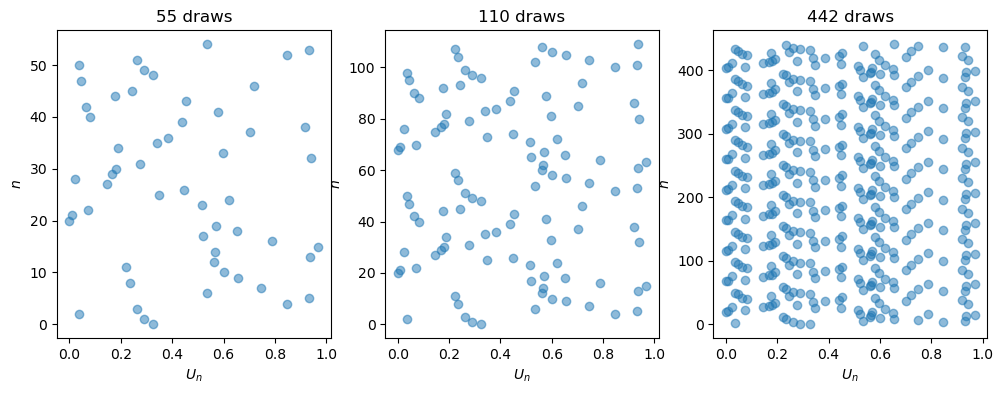

In [5]:
fig=plt.figure(figsize=(12,4))

plt.subplot(131)
N_used=N//8
plt.title(f"{N_used} draws")
plt.scatter(U[:N_used],np.arange(N_used),alpha=0.5)
plt.xlabel("$U_n$")
plt.ylabel("$n$")

plt.subplot(132)
N_used=N//4
plt.title(f"{N_used} draws")
plt.scatter(U[:N_used],np.arange(N_used),alpha=0.5)
plt.xlabel("$U_n$")
plt.ylabel("$n$")

plt.subplot(133)
N_used=N
plt.title(f"{N_used} draws")
plt.scatter(U[:N_used],np.arange(N_used),alpha=0.5)
plt.xlabel("$U_n$")
plt.ylabel("$n$")

### Problem 1.3

Test if the distribution of the first $N_1$, $N_2$ and $N_3$ elements in the sequence is **uniform**
using `scipy.stats.kstest`

What is your conclusion?

In [6]:
stats.kstest(U[:N//8],"uniform",alternative="two-sided",mode="exact")

KstestResult(statistic=0.12570958453311398, pvalue=0.3223092219151982)

In [7]:
stats.kstest(U[:N//4],"uniform",alternative="two-sided",mode="exact")

KstestResult(statistic=0.12570958453311398, pvalue=0.056536302592077085)

In [8]:
stats.kstest(U,"uniform",alternative="two-sided",mode="exact")

KstestResult(statistic=0.13348416289592757, pvalue=2.4984637323328203e-07)

## Problem 2: Empirical Stock Distribution

In this problem we will test if the empirical distribution of stock prices is consistent with a Gaussion of Student's T distribution.

### Problem 2.1

Read the contents of file `history_VZ.cs`. It constains 5 years of stock price history for Verizon's (VZ) shared.

We will only be using the `Date` and `Close` price columns.


In [9]:

prices=pd.read_csv(f"{data_dir}/history_VZ.csv",
                      usecols=["Date","Close"],
                      index_col=["Date"],
                      parse_dates=["Date"])
prices

,Close
Date,
2018-01-24,42.970551
2018-01-25,43.026012
2018-01-26,43.366806
2018-01-29,42.899212
2018-01-30,42.716938
...,...
2023-01-18,39.970001
2023-01-19,40.060001
2023-01-20,40.000000


### Problem 2.2

Compute the daily stock market returns using function `pandas.DataFrame.pct_change`

In [10]:
returns=prices.pct_change().dropna()
returns

,Close
Date,
2018-01-25,0.001291
2018-01-26,0.007921
2018-01-29,-0.010782
2018-01-30,-0.004249
2018-01-31,0.003154
...,...
2023-01-18,-0.021542
2023-01-19,0.002252
2023-01-20,-0.001498


### Problem 2.3

Generate 2 one-dimensional `numpy` arrays:
1. First one will all the stock returns before `2022-01-24`
2. The second one will all the return at or after `2022-01-24`

In [11]:
R0=returns[returns.index<"2022-01-24"]["Close"].values
R1=returns[returns.index>="2022-01-24"]["Close"].values
R0.shape,R1.shape

((1006,), (252,))

### Problem 2.4

Using `stats.norm.fit` estimate the mean $\mu$ and standard deviations $\sigma$ 
of the Gaussian distribution that better fits the returns **before 2022-01-24**

Define a `stats.norn` distribution with those paramers

In [12]:
mu,std=stats.norm.fit(R0)
mu,std

(0.00022735886820470994, 0.012044484052913028)

In [13]:
dist0=stats.norm(mu,std)


### Problem 2.5

Make a plot when you superimpose the histogram of returns before 2022-01-24 to the best fit Gaussian PDF.

Make the plot extend the range $\mu \pm 6 \sigma$
and use 25 bins (`plt.plot`'s `bins` argument ) for the histogram

Does this look like a good fit?


Text(0, 0.5, 'PDF')

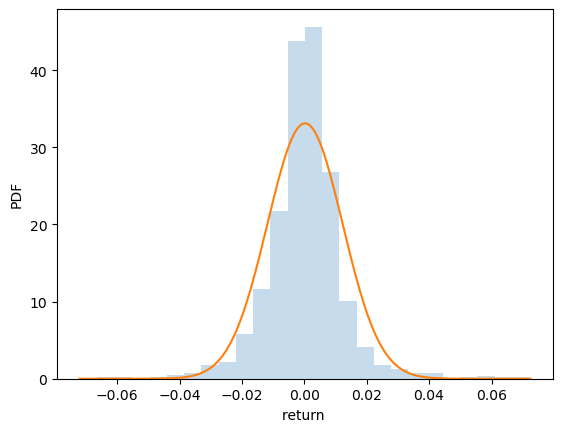

In [14]:
z=np.linspace(mu-6*std,mu+6*std,201)
plt.hist(R0,bins=25,alpha=0.25,density=True)
plt.plot(z,dist0.pdf(z))
plt.xlabel("return ")
plt.ylabel("PDF")

### Problem 2.6

Perform the K-S test comparing the returns before 2022-01-24 to the best fit Gaussian you just estimated.

Does the test pass?

Is this procedure statistically justified? If not, why not?

In [15]:
# the p value is too high, because we have used the data in R0
# to estimate dist0 and that invalidates the test distribution assumptions.
stats.kstest(R0,dist0.cdf,alternative="two-sided",mode='exact')

KstestResult(statistic=0.07837484433997066, pvalue=8.029976750181769e-06)

### Problem 2.7

Using `stats.t.fit` estimate the number of degrees of freedom $n$, mean $\mu$ and standard deviations $\sigma$ 
of the Student's T  distribution that better fits the returns **before 2022-01-24**

Define a `stats.t ` distribution with those paramers

In [16]:
df,mu,std=stats.t.fit(R0)
df,mu,std

(2.9059009267607285, 0.000391094572834536, 0.007447368272426072)

In [17]:
dist1=stats.t(df,mu,std)
dist1

### Problem 2.8 

Make a plot when you superimpose the histogram of returns before 2022-01-24 to the best fit Student's T PDF.

Make the plot extend the range $\mu \pm 6 \sigma$
and use 25 bins (`plt.plot`'s `bins` argument ) for the histogram

Does this look like a good fit?


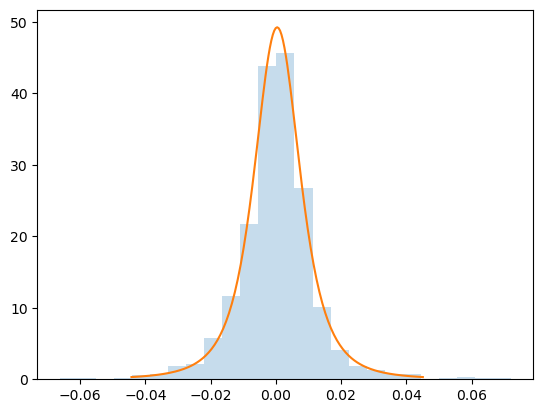

In [18]:
z=np.linspace(mu-6*std,mu+6*std,201)
plt.hist(R0,bins=25,alpha=0.25,density=True)
plt.plot(z,dist1.pdf(z))

Perform the K-S test comparing the returns before 2022-01-24 to the best fit Studen't T you just estimated.

Does the test pass?

Is this procedure statistically justified? If not, why not?

In [19]:
# The test pass, but it is still not statistically justified.
stats.kstest(R0,dist1.cdf,alternative="two-sided",mode='exact')

KstestResult(statistic=0.017989511730773594, pvalue=0.8947000681440009)

### Problem 2.9

Make a plot of the histogram of stock returns **after 2022-01-24**  and compared to the PDF of the  Student's T
distribution you just estimated from data  **before 2022-01-24**.

Is is a good fit?

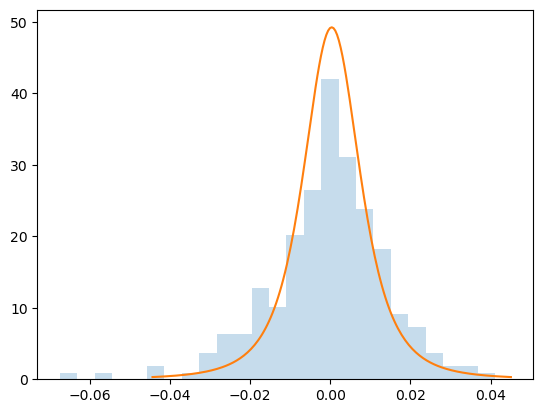

In [20]:
# the fit is not as good.
z=np.linspace(mu-6*std,mu+6*std,201)
plt.hist(R1,bins=25,alpha=0.25,density=True)
plt.plot(z,dist1.pdf(z))

### Problem 2.10

Perform the K-S Test comparing the  stock returns **after 2022-01-24**  to the Studet's T distribution estimated with returns **before 2022-01-24**.

Does the test pass? What is your conclusion?

In [21]:
#
# There are two factors that contribute to the P-values 
#   been lower out of sample
#   1. We overfitted generating the Student's T distribution using data from
#      the in-sample period
#   2. The stock return distribution can genuinely change from period to period
#      due to economic conditions.
stats.kstest(R1,dist1.cdf,alternative="two-sided",mode='exact')

KstestResult(statistic=0.0878176405962019, pvalue=0.03855851130896548)

## Bonus Problem 3: Log Normal Risk Neutral Distribution 

In this problem we will review how to 
1. price European Options using Black-Scholes Formula
2. How Construct the Risk Neutral distribution given a float volatility
3. Compare the Implied Risk Neutral distribution to the Log Normal Distribution

#### Some Useful Code

In [22]:
ndtr=stats.norm.cdf
epsilon=1e-12

def bs_price_fwd(isCall, K, T, F, sigma):
    """ Black's pricing formula
    
    European option  forward price as a function of
    the asset's forward.
    
    :param isCall: True for calls , False for Puts
    :type isCall: Boolean
    :param K: option strike
    :param T: option expiry in years
    :param F: forward of the options underlying asset
    :param sigma: underlying's  volatility
    :return: option's forward price
    """
    ds=np.maximum(0.000001,sigma*np.sqrt(T))
    dsig=0.5*ds*ds
    d2=(np.log(F/np.maximum(K,epsilon))-dsig)/ds
    d1=d2+ds
    if isCall:
        opt= F*ndtr(d1) - K*ndtr(d2)
    else:
        opt= K*ndtr(-d2) - F*ndtr(-d1)
    return opt

In [23]:
# Call and Put payout as a function of the stock price S at maturity
# and the option strike K
def call_payout(S,K):
    return np.maximum(S-K,0)
def put_payout(S,K):
    return np.maximum(K-S,0)

### Problem 3.1

Plot the call and put payouts for a call and put options with strike $K=1$ for the range of 
stock prices (0,2)

[HINT] You can use the functions `call_payout` and `put_payout` defined above.

In [24]:
K=1.0

In [25]:
S=np.linspace(0,2,101)

In [26]:
call=call_payout(S,K)
put=put_payout(S,K)
call.shape,put.shape

((101,), (101,))

Text(0, 0.5, 'payout')

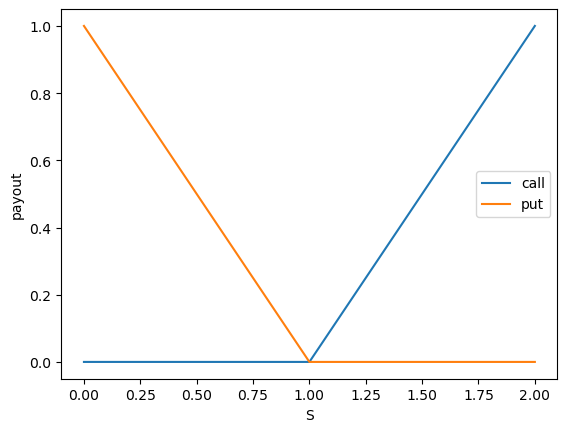

In [27]:
plt.plot(S,call,label="call")
plt.plot(S,put,label="put")
plt.legend()
plt.xlabel("S")
plt.ylabel("payout")

### Problem 3.2

Using Black-Scholes (`bs_bPrice a call and a put option with:
1. Expiry $T=1$.
2. Strike $K=1$.

Given the following market conditions 
1. Forward $F=1$.
2. At the Money Volatility $\sigma_{\text{ATM}}=20\%$

Are the two prices equal, if so, can you explain why?

In [28]:
T=1.0
F=1.0
vol_ATM=0.2

In [29]:
bs_price_fwd(True,K,T,F,vol_ATM)

0.07965567455405798

In [30]:
# put price is equal to call price because of put-call parity
bs_price_fwd(False,K,T,F,vol_ATM)

0.07965567455405798

### Problem 3.3

We defina  put spread position with strike $K$ and *width* $\Delta K$ as a 
position  :
1. Long a notional \frac{1}{\Delta} K$ of the put with strike $K+\Delta K$.
2. Short a notional \frac{1}{\Delta} K$ of the put with strike $K$.
Its payout at expiry is:
$$
  		\text{Put\_Spread}(S,K,\Delta K) =  \frac{1}{\Delta K} \left ( \text{Put}(S,K+\Delta K) - \text{Put}(S,K) \right ) 
		
$$ 

Implement the function `put_spread_payout` below.

[HINT] You can use the `put_payout` function above to simplify your implementation

In [31]:
def put_spread_payout(S,K,dK):
   pass

In [32]:
def put_spread_payout(S,K,dK):
    return 1/dK*(put_payout(S,K+dK)-put_payout(S,K))

In [33]:
dK=0.05

### Problem 3.4

Plot the payout as a function of the terminal spot price (in the range (0,2) ) for a put spread with strike $K=1$ and width $\Delta K = 0.05$.

In [34]:
put_spread=put_spread_payout(S,K,dK)

Text(0, 0.5, 'Payout')

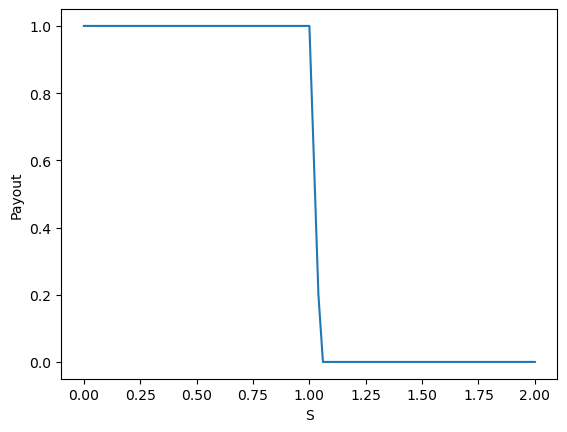

In [35]:
plt.plot(S,put_spread)
plt.xlabel("S")
plt.ylabel("Payout")

### Problem 3.5

Implement the function `bs_put_spread_flat` pricing a put spread option given
1. Its strike $K$ and withd $\Delta K$.
2. Its expiry $T$.
3. The market forward $F$.
4. The ATM volatility $\sigma_\text{ATM}$


For now we assume, as in the Black-Scholes model, that options with all strikes have the same implied volatility $\sigma_\text{ATM}$

In [36]:
def bs_put_spread_flat(K,T,F,sigma,dK):
    pass

In [37]:
def bs_put_spread_flat(K,T,F,sigma,dK):
    return 1/dK*(bs_price_fwd(False,K+dK,T,F,sigma)-bs_price_fwd(False,K,T,F,sigma))

### Problem 3.6

Price a put spread given that:
1. Strike $K=1$ and withd $\Delta K=5\%$.
2. Expiry $T=1$
3. Forward $F=1.0$
4. ATM volatility $\sigma_\text{ATM}$ is 20\%.

In [38]:
bs_put_spread_flat(K,T,F,vol_ATM,dK)

0.5880052032299399

### Problem 3.7

1. Compute the price of put strike for 101 strikes in the range (0.1,1) range.
2. Make a plot strike vs put spread  option price 

We will use this array of prices as an approximation to the Risk Neutral Cumulative Density Function (CDF) of the stock distribution at expiry $T$.

$$
    \text{CDF}(K) \approx \text{Put\_Spread}(S,K,\Delta K)
$$

In [39]:
Ks=np.linspace(0.1,2,101)
cdf=bs_put_spread_flat(Ks,T,F,vol_ATM,dK)


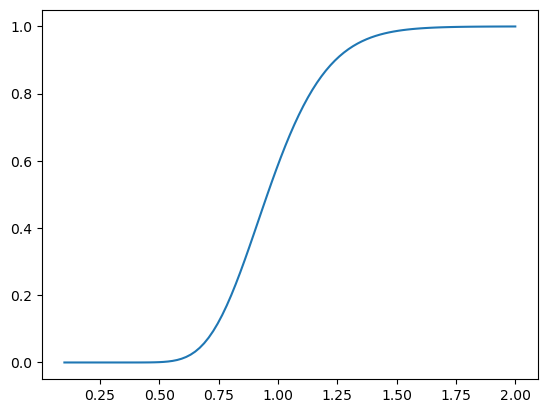

In [40]:
plt.plot(Ks,cdf)

### Problem 3.8

Estimate the Risk Neutral Probability Density Function (CDF)  using the formula:\
$$
\text{PDF}(K) \approx  \frac{\text{CDF}(K+\Delta K) - \text{CDF}(K)}{\Delta K}
$$

Make a plot of the PDF as a function of strike $K$.

In [41]:
pdf=np.diff(cdf)/np.diff(Ks)

Text(0, 0.5, 'PDF(K)')

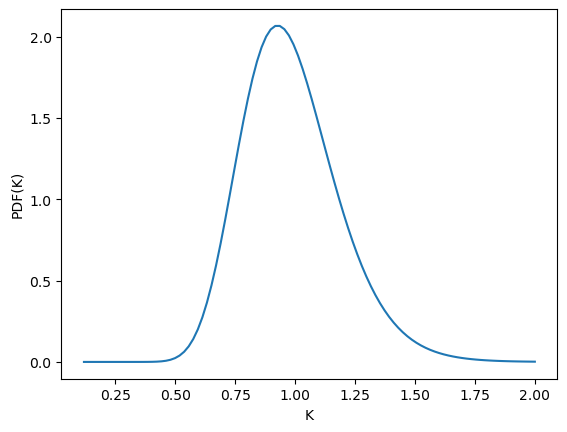

In [42]:
plt.plot(Ks[1:],pdf)
plt.xlabel("K")
plt.ylabel("PDF(K)")

### Problem 3.9

Use `scipy.stat.lognorm` to define the log normal distribution implied by the pricing assumptions
1. $T=1$
2. $F=1$
3. $\sigma_\text{ATM}=0.2\%$

[HINT] The parameters required by `stat.lognorm` are
1. parameter `s`: 
    $$
        \text{s}= \sqrt{\sigma_\text{ATM}^2 T}
    $$
2. parameter `scale`: 
    $$
    \text{scale}=F e^{-\frac{1}{2} \sigma_\text{ATM}^2 T}
    $$


In [43]:
var0=vol_ATM**2*T
ln=stats.lognorm(s=np.sqrt(var0),scale=F*np.exp(-0.5*var0))

### Problem 3.10

Make a plot comparing the log-normal PDF you just the defined to the risk neutral PDF you computed before.

To they agree?

Text(0, 0.5, 'Pdf(S)')

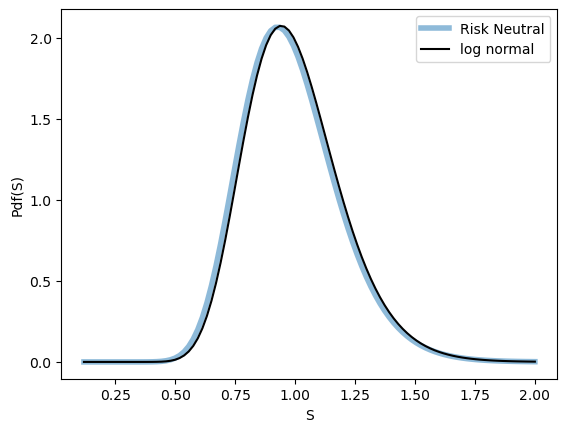

In [44]:
plt.plot(Ks[1:],pdf,alpha=0.5,linewidth=4,label="Risk Neutral")
plt.plot(Ks[1:],ln.pdf(Ks[1:]),c="black",label="log normal")
plt.legend()
plt.xlabel("S")
plt.ylabel("Pdf(S)")


## Problem 4: Vol Skew and Risk Neutral Distribution

In this problem we will define a Risk Neutral distribution in a situation where we
allow option volatility to depend on strike.

In [45]:
class SVICurve:
    def __init__(self,T,F,vol_ATM,b,rho,m,sigma):
        self.T=T
        self.F=F
        self.a=vol_ATM**2*T-b*(-rho*m+np.sqrt(m**2+sigma**2)) 
        self.b=b
        self.rho=rho
        self.m=m
        self.sigma=sigma        
    def __call__(self,K):
        k=np.log(K/self.F)
        var=self.a + self.b*(self.rho*(k-self.m)+np.sqrt((k-self.m)**2+self.sigma**2))
        return np.sqrt(var/self.T)

### Problem 4.1

Define a SVI volatility Curve using the following assumptions

1. Expiry $T=1$
2. Forward $F=1$
3. ATM Volatility $\sigma_\text{ATM} =20\%$
4. The other parameters of the SVI parametrization are given by:
    1. b=0.1
    2. rho=-0.8
    3. m=0
    4. $\tilde{\sigma}$=0.2
 

In [46]:
sigma=0.2
b=0.1
rho=-0.8
m=0


In [47]:
svi_vol=SVICurve(T,F,vol_ATM,b,rho,m,sigma)

### Problem 4.2

Ask the SVI volatility object for the ATM volatity ($K=F$), show that the result is $\sigma_\text{ATM}$

In [48]:
svi_vol(F)

0.2

### Problem 4.3

Plot the volatility curve for the range of strikes (0.1,2)

Ks=np.linspace(0.1,2,101)

Text(0, 0.5, '$\\sigma$')

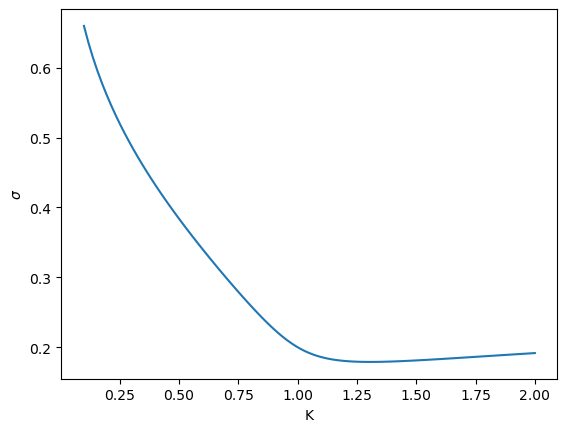

In [49]:
vols=svi_vol(Ks)
plt.plot(Ks,vols)
plt.xlabel("K")
plt.ylabel("$\sigma$")

### Problem 4.4

Implement the function `bs_put_spread`.

This function prices a put spread given a volatility curve `svi_vol`, so that 
the volatility for an option with strike $K$ is  `svi_vol(K)`.

In [50]:
def bs_put_spread(K,T,F,svi_vol,dK):
    pass

In [51]:
def bs_put_spread(K,T,F,svi_vol,dK):
    sig0=svi_vol(K+dK)
    sig1=svi_vol(K)
    return 1/dK*(bs_price_fwd(False,K+dK,T,F,sig0)-bs_price_fwd(False,K,T,F,sig1))

### Problem 4.5

Compute the put strike price for 101 strikes in the range (0.1,2).

Use those put spread prices to estimate the risk neutral CDF and PDFs implied by the SVI volatility surface.

In [52]:
cdf=bs_put_spread(Ks,T,F,svi_vol,dK)

In [53]:
pdf=np.diff(cdf)/np.diff(Ks)

### Problem 4.6

Make a plot comparing the log normal distribution implied by a flat 20\% volatility (as you computed in Problem 3) to the risk neutral distribution implied by the SVI surface.

Text(0, 0.5, 'Pdf(S)')

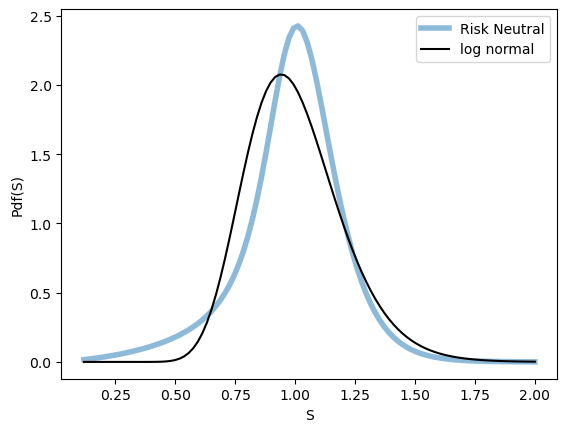

In [54]:
plt.plot(Ks[1:],pdf,alpha=0.5,linewidth=4,label="Risk Neutral")
plt.plot(Ks[1:],ln.pdf(Ks[1:]),c="black",label="log normal")
plt.legend()
plt.xlabel("S")
plt.ylabel("Pdf(S)")